### Linear Regression

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

path = "../src/"
concrete = pd.read_csv(path + "data/concrete+slump+test/slump_test.data")
concrete.rename(columns={'No':'id', 
                         'Compressive Strength (28-day)(Mpa)':'Comp_Strength',
                         'FLOW(cm)': 'Flow'},
                inplace=True)
crab = pd.read_csv(path + "data/crab.txt", sep="\\s+")

### Regression Model

In [ ]:
model = ols('weight ~ width*C(spine, Treatment)', data=crab).fit()
model.summary()

### Regression Model Analysis

- The p-value for the t-test for H0 (p-value of $\beta_0$)

In [ ]:
model.pvalues['Intercept'] 

- The estimate of $\beta_4$

In [ ]:
model.params
model.params.iloc[4]


- The residual sum of squares.

In [ ]:
model.ssr


- The estimate of $\sigma^2$

In [ ]:
model.mse_resid


- The adjusted $R^2$ value

In [ ]:
model.rsquared_adj

#### Predict Means 

Generate new points of regressors using `np.linspace(start, stop, number_of_points)`

In [ ]:
new_df1 = sm.add_constant(pd.DataFrame({'Water' : np.linspace(160, 240, 10)})) # generate a series of point
new_df2 = sm.add_constant(pd.DataFrame({'width': [27.0], 'spine': [1]}), has_constant='add')

Predict value using model

In [ ]:
predictions_out = model.get_prediction(new_df2)
predictions_out.conf_int(alpha=0.05) # 95% confidential interval
model.predict(new_df2) # use model to predict value

array([[2.56325586, 2.73486504]])

Plot Regression Line and Confidence Interval

In [30]:
widths = np.arange(22, 34 + 1e-8, 0.2)
new_points = sm.add_constant(pd.DataFrame({'width': widths, 'spine': np.ones_like(widths)}), has_constant='add')
predictions_out = model.get_prediction(new_points)

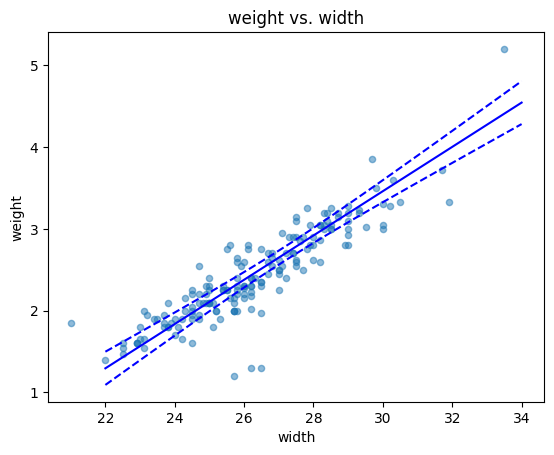

In [29]:
ax = crab.plot(x='width', y='weight', kind='scatter', alpha=0.5)
ax.set_title('weight vs. width')
# Plot 95%-Confidence Interval
ax.plot(new_points.width, predictions_out.conf_int(alpha=0.05)[:, 0].reshape(-1), color='blue', linestyle='dashed')
ax.plot(new_points.width, predictions_out.conf_int(alpha=0.05)[:, 1].reshape(-1), color='blue', linestyle='dashed')
# Plot the regression line
ax.plot(new_points.width, predictions_out.predicted, color='blue')

#### Residual Normality

<Axes: >

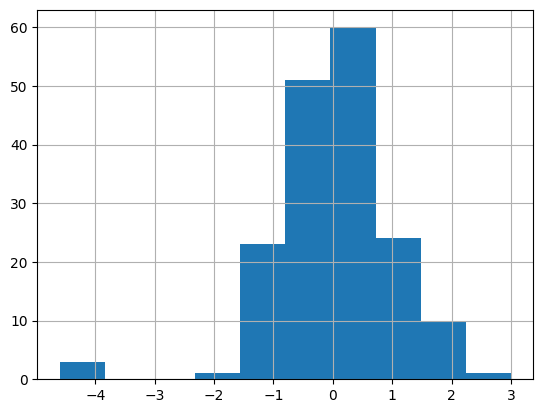

In [31]:
residuals = pd.Series(model.resid_pearson)
residuals.hist()

In [ ]:
stats.shapiro(residuals)

sm.qqplot(model.resid, line="q")